# 거주인구 데이터 EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math

In [ ]:
sns.__version__

'0.11.1'

In [ ]:
df_data = pd.read_csv('data/03_거주인구_RESIDENT_POP.CSV', encoding='cp949')
df_data.head()

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797
2,2018,1,제주시,50110256,구좌읍,남성,7965,368,8333
3,2018,1,제주시,50110256,구좌읍,여성,7609,184,7793
4,2018,1,서귀포시,50130253,남원읍,남성,9806,428,10234


In [ ]:
df_data.shape

(3612, 9)

In [ ]:
df_data.tail()

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop
3607,2021,6,제주시,50110250,한림읍,여성,10341,1140,11481
3608,2021,6,제주시,50110600,화북동,남성,12062,169,12231
3609,2021,6,제주시,50110600,화북동,여성,12238,161,12399
3610,2021,6,서귀포시,50130550,효돈동,남성,2660,39,2699
3611,2021,6,서귀포시,50130550,효돈동,여성,2597,18,2615


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   base_year      3612 non-null   int64 
 1   base_month     3612 non-null   int64 
 2   city           3612 non-null   object
 3   emd_cd         3612 non-null   int64 
 4   emd_nm         3612 non-null   object
 5   sex            3612 non-null   object
 6   resid_reg_pop  3612 non-null   int64 
 7   foreign_pop    3612 non-null   int64 
 8   total_pop      3612 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 254.1+ KB


In [ ]:
# raw data에서 describe는 pop 결과만 유의미함
df_data.describe()

,base_year,base_month,emd_cd,resid_reg_pop,foreign_pop,total_pop
count,3612.000000,3612.000000,3.612000e+03,3612.00000,3612.000000,3612.000000
mean,2019.285714,6.071429,5.011841e+07,7782.42691,280.084718,8062.511628
std,1.030300,3.425820,9.764379e+03,6430.85599,366.921095,6638.318372
min,2018.000000,1.000000,5.011025e+07,752.00000,10.000000,763.000000
25%,2018.000000,3.000000,5.011054e+07,2538.00000,65.000000,2633.750000
50%,2019.000000,6.000000,5.011065e+07,6292.50000,134.500000,6542.000000
75%,2020.000000,9.000000,5.013052e+07,10941.25000,330.000000,11712.500000
max,2021.000000,12.000000,5.013062e+07,28241.00000,2396.000000,29178.000000


### 결측치 확인

In [ ]:
df_data.isna().sum()

base_year        0
base_month       0
city             0
emd_cd           0
emd_nm           0
sex              0
resid_reg_pop    0
foreign_pop      0
total_pop        0
dtype: int64

### 각 컬럼의 최대/최소/평균/표준편차 등 파악

In [ ]:
df_data['total_pop'].describe()

count     3612.000000
mean      8062.511628
std       6638.318372
min        763.000000
25%       2633.750000
50%       6542.000000
75%      11712.500000
max      29178.000000
Name: total_pop, dtype: float64

In [ ]:
df_data['resid_reg_pop'].describe()

count     3612.00000
mean      7782.42691
std       6430.85599
min        752.00000
25%       2538.00000
50%       6292.50000
75%      10941.25000
max      28241.00000
Name: resid_reg_pop, dtype: float64

In [ ]:
df_data['foreign_pop'].describe()

count    3612.000000
mean      280.084718
std       366.921095
min        10.000000
25%        65.000000
50%       134.500000
75%       330.000000
max      2396.000000
Name: foreign_pop, dtype: float64

## 지역 파악

In [ ]:
df_data['emd_nm'].unique()

array(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면',
       '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동',
       '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'], dtype=object)

In [ ]:
df_data[df_data['city']=='제주시']['emd_nm'].unique()

array(['건입동', '구좌읍', '노형동', '도두동', '봉개동', '삼도1동', '삼도2동', '삼양동', '아라동',
       '애월읍', '연동', '오라동', '외도동', '용담1동', '용담2동', '우도면', '이도1동', '이도2동',
       '이호동', '일도1동', '일도2동', '조천읍', '추자면', '한경면', '한림읍', '화북동'],
      dtype=object)

In [ ]:
df_data[df_data['city']=='서귀포시']['emd_nm'].unique()

array(['남원읍', '대륜동', '대정읍', '대천동', '동홍동', '서홍동', '성산읍', '송산동', '안덕면',
       '영천동', '예래동', '정방동', '중문동', '중앙동', '천지동', '표선면', '효돈동'],
      dtype=object)

# bot-plot 통계분포 파악

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install xgboost

In [ ]:
# matplotlib, seaborn 한국말 깨짐 현상 해결
plt.rcParams['font.family'] = 'NanumGothic'

## sex, city, emd_nm 별 boxplot 진행

## 1. sex 기준

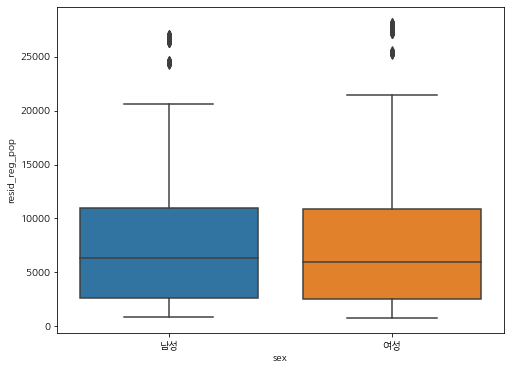

In [ ]:
test1 = pd.concat([df_data['sex'], df_data['resid_reg_pop']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='sex', y='resid_reg_pop', data = test1)

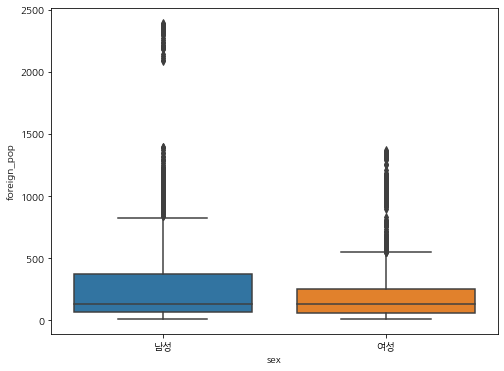

In [ ]:
test1 = pd.concat([df_data['sex'], df_data['foreign_pop']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='sex', y='foreign_pop', data = test1)

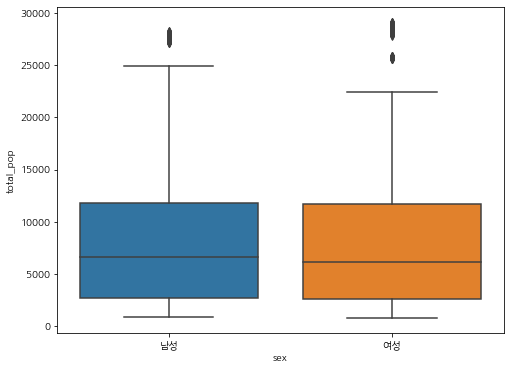

In [ ]:
test1 = pd.concat([df_data['sex'], df_data['total_pop']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='sex', y='total_pop', data = test1)

### sex별 탐색 후 결론 : 
남성/여성의 boxplot의 위치가 크게 다르지 않으므로 대략적 이상치를 기준으로 어느 지역인지 추출하기

## 2. city 기준

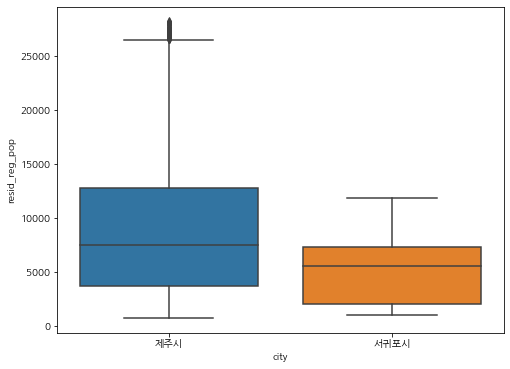

In [ ]:
test1 = pd.concat([df_data['city'], df_data['resid_reg_pop']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='city', y='resid_reg_pop', data = test1)

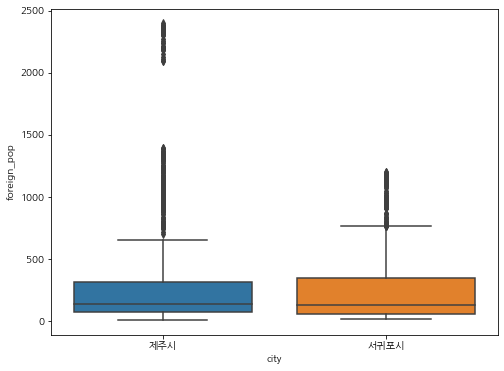

In [ ]:
test1 = pd.concat([df_data['city'], df_data['foreign_pop']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='city', y='foreign_pop', data = test1)

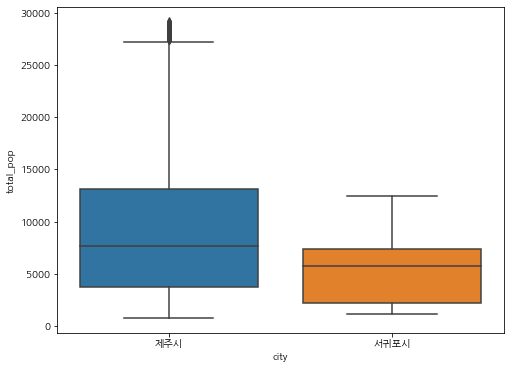

In [ ]:
test1 = pd.concat([df_data['city'], df_data['total_pop']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='city', y='total_pop', data = test1)

### 제주/서귀포 비교 결과
제주시와 서귀포시의 boxplot 위치와 범위 차이가 크므로 제주시/서귀포시의 인구 차이를 비교할 필요가 있음

## 지역&성별 합친 boxplot

<AxesSubplot:xlabel='city', ylabel='total_pop'>

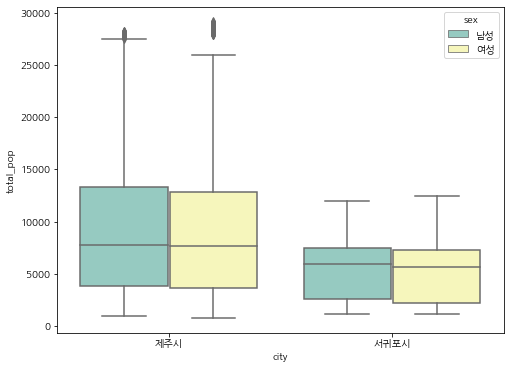

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="city", y="total_pop", hue="sex",
               data=df_data, palette="Set3")

<AxesSubplot:xlabel='city', ylabel='foreign_pop'>

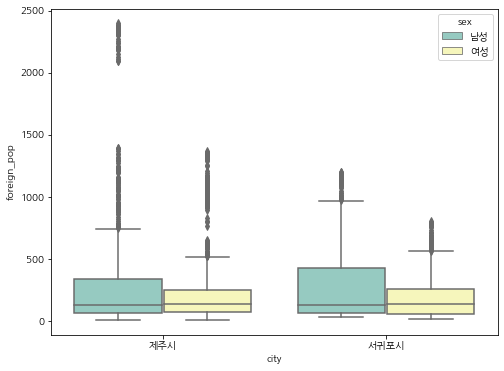

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="city", y="foreign_pop", hue="sex",
               data=df_data, palette="Set3")

<AxesSubplot:xlabel='city', ylabel='resid_reg_pop'>

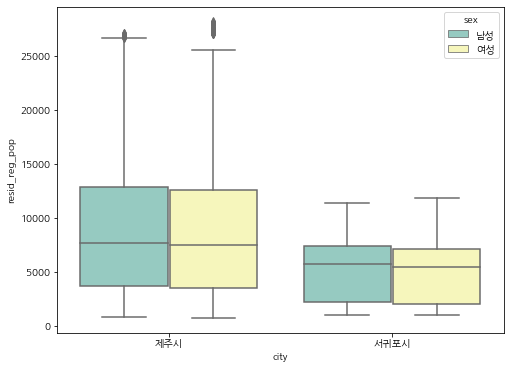

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="city", y="resid_reg_pop", hue="sex",
               data=df_data, palette="Set3")

## 제주/서귀포 나눠서 지역별 인구 boxplot진행

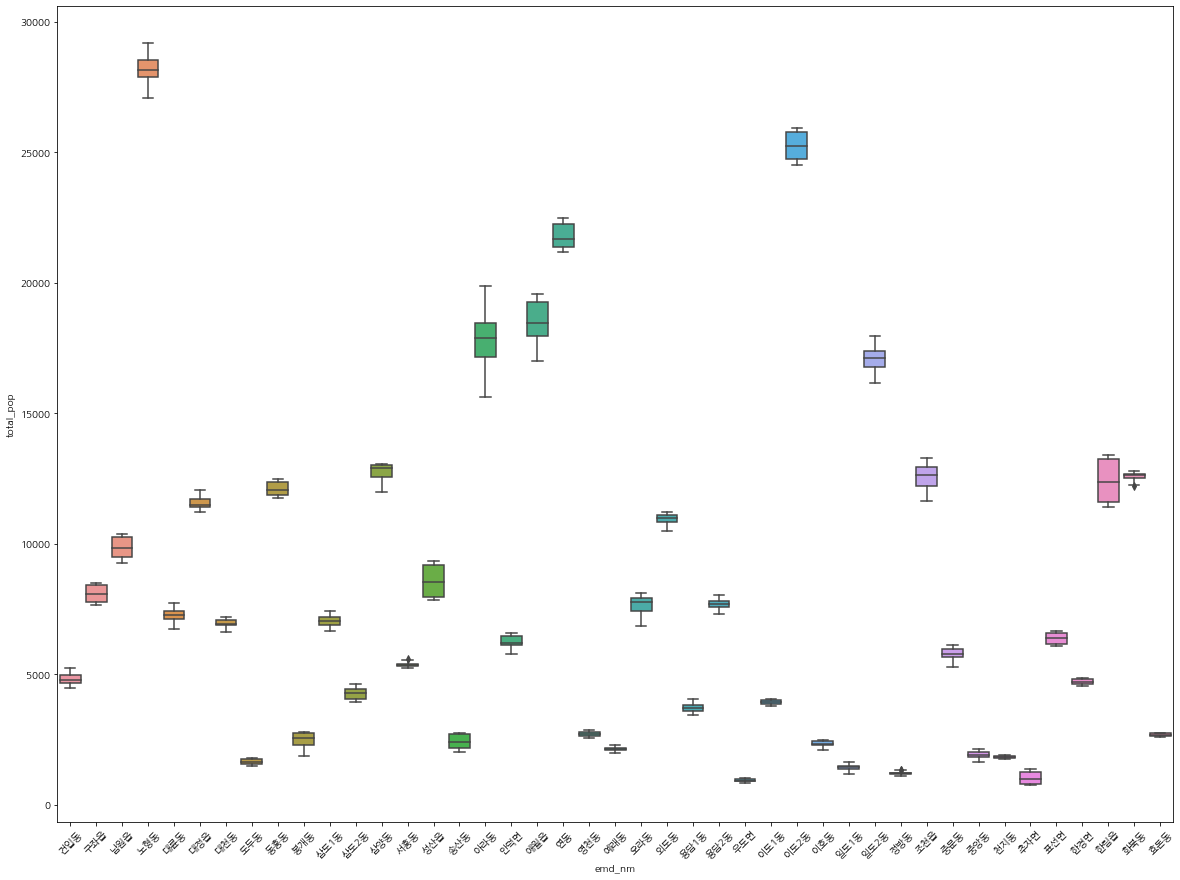

In [ ]:
test1 = pd.concat([df_data['emd_nm'], df_data['total_pop']], axis=1)
f, ax = plt.subplots(figsize=(20,15))
plt.xticks(rotation=45)
fig = sns.boxplot(x='emd_nm', y='total_pop', data = test1)

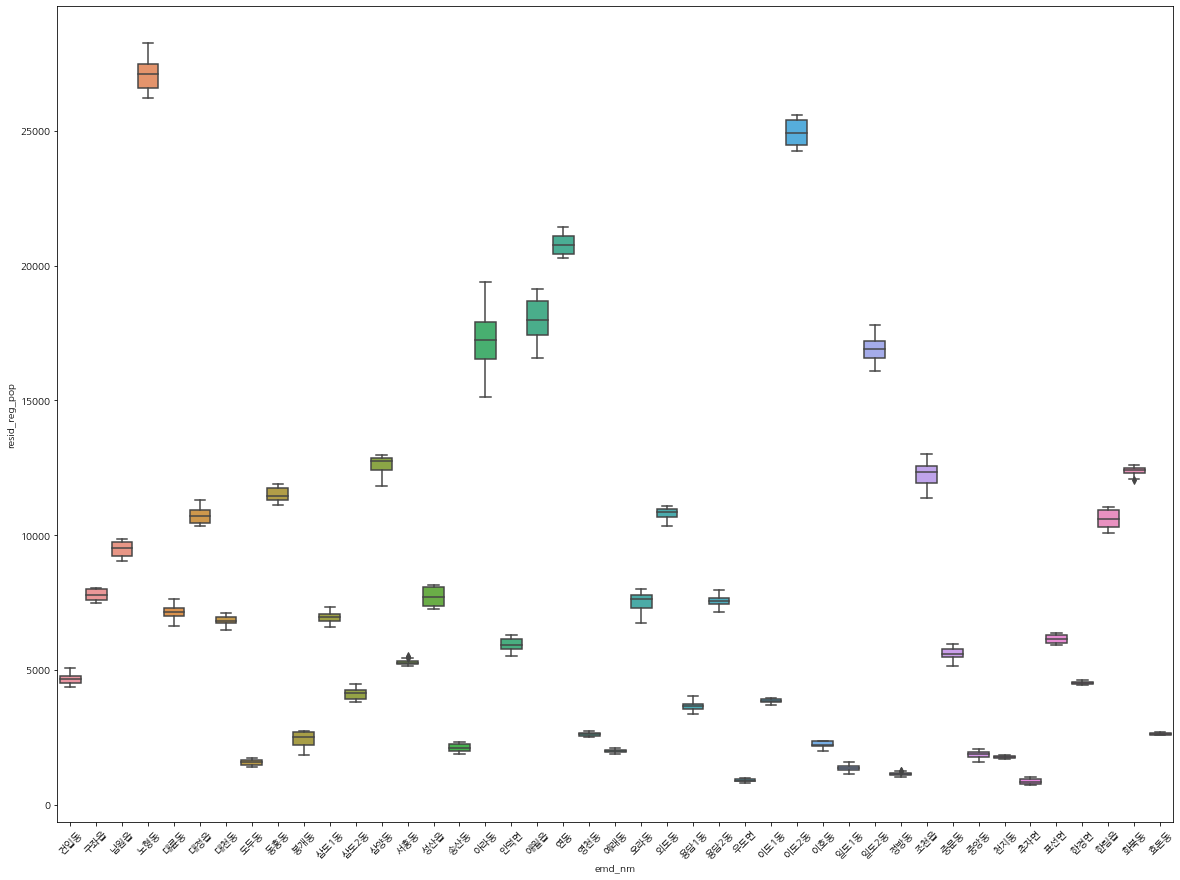

In [ ]:
test1 = pd.concat([df_data['emd_nm'], df_data['resid_reg_pop']], axis=1)
f, ax = plt.subplots(figsize=(20,15))
plt.xticks(rotation=45)
fig = sns.boxplot(x='emd_nm', y='resid_reg_pop', data = test1)

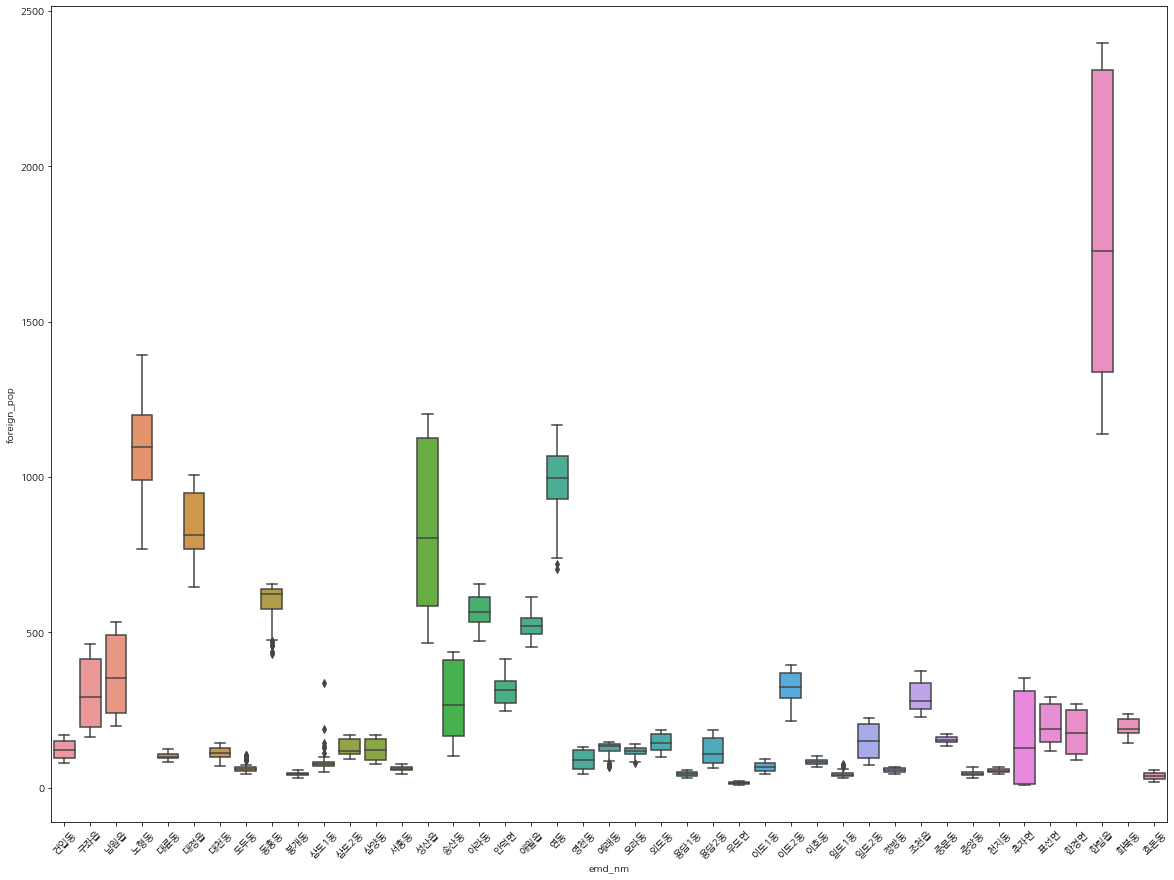

In [ ]:
test1 = pd.concat([df_data['emd_nm'], df_data['foreign_pop']], axis=1)
f, ax = plt.subplots(figsize=(20,15))
plt.xticks(rotation=45)
fig = sns.boxplot(x='emd_nm', y='foreign_pop', data = test1)

외국인 인구는 전체 인구의 약 10%이므로 큰 영향은 없을 것.

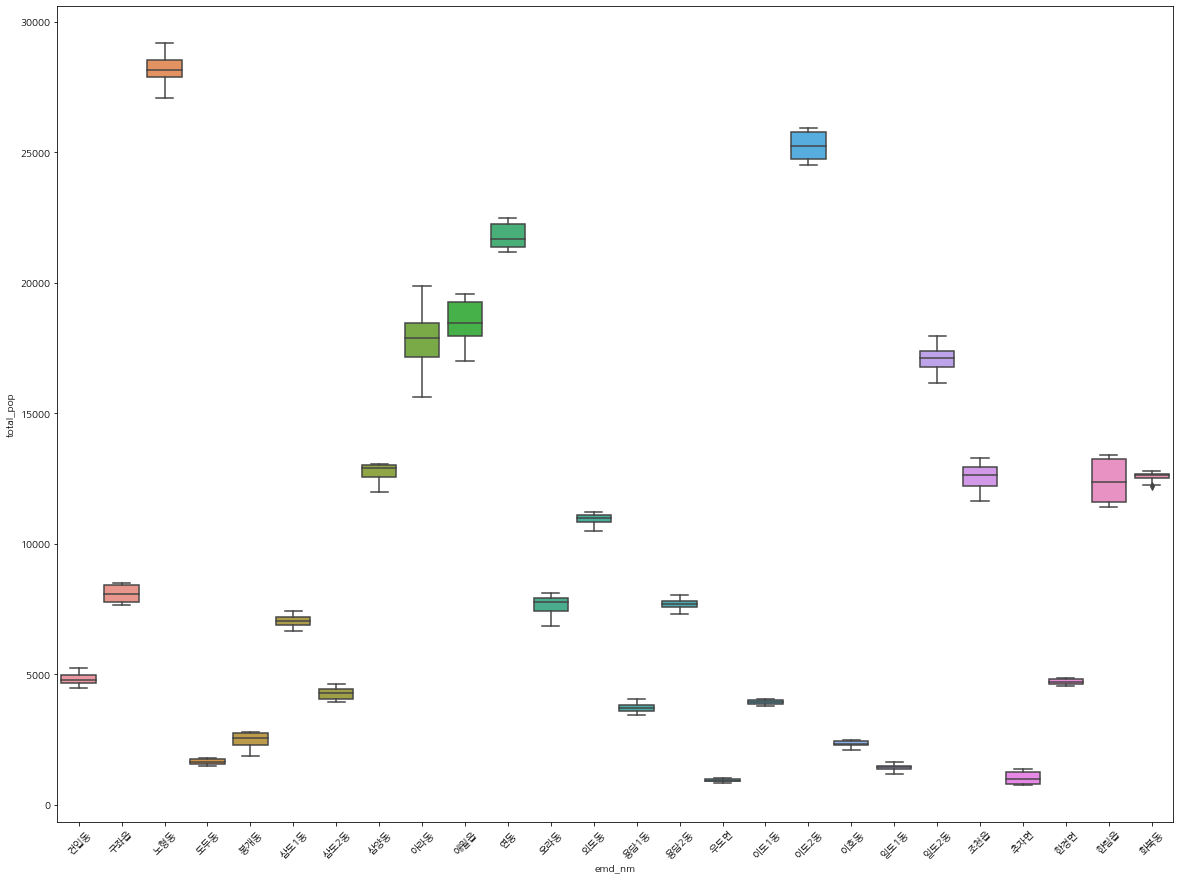

In [ ]:
testjeju = df_data[df_data['city']=='제주시']
test1 = pd.concat([testjeju['emd_nm'], testjeju['total_pop']], axis=1)
f, ax = plt.subplots(figsize=(20,15))
plt.xticks(rotation=45)
fig = sns.boxplot(x='emd_nm', y='total_pop', data = test1)

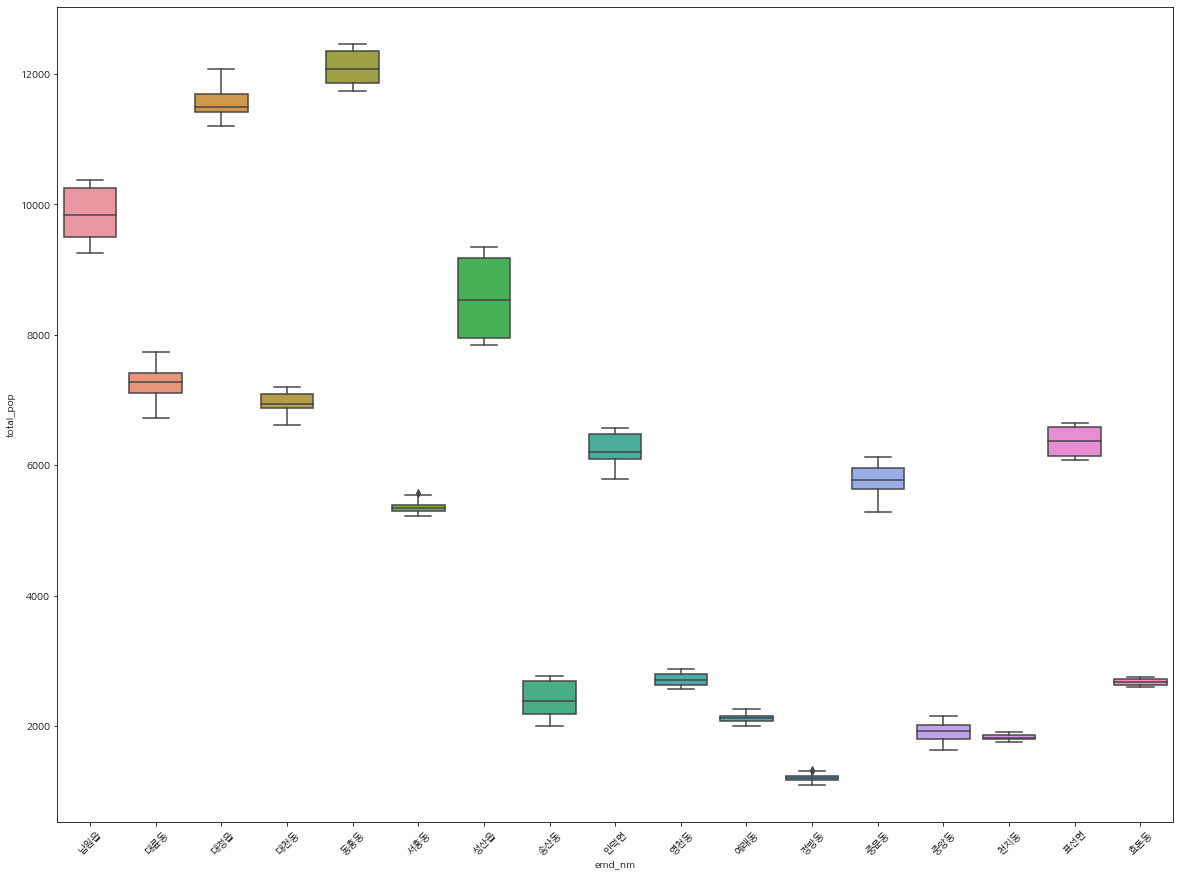

In [ ]:
testseogui = df_data[df_data['city']=='서귀포시']
test1 = pd.concat([testseogui['emd_nm'], testseogui['total_pop']], axis=1)
f, ax = plt.subplots(figsize=(20,15))
plt.xticks(rotation=45)
fig = sns.boxplot(x='emd_nm', y='total_pop', data = test1)

### boxplot 해석
- 1차적 boxplot으로 이상치를 확인하고, 그에 따라 각 인구측정별 큰값의 지역을 산출한 결과, 43+알수없음 지역 중 1/3이하, 즉 5개 이하의 지역만 뽑혔기 때문에 이상치라고 볼 수 없다. 지역적 특성때문에 측정된 것으로 파악.

In [ ]:
df_data[df_data['resid_reg_pop']>25000]['emd_nm'].unique()
# 지역이 많으면 year, month별 특징을 찾으면 되지만, 딱 2 지역이므로 전체 인구 순위를 파악해야 함

array(['노형동', '이도2동'], dtype=object)

In [ ]:
df_data[df_data['foreign_pop']>750]['emd_nm'].unique()

array(['노형동', '대정읍', '성산읍', '연동', '한림읍'], dtype=object)

In [ ]:
df_data[df_data['total_pop']>25000]['emd_nm'].unique()

array(['노형동', '이도2동'], dtype=object)

## missing data

Text(0.5, 1.0, 'Total Missing Value (%)')

C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


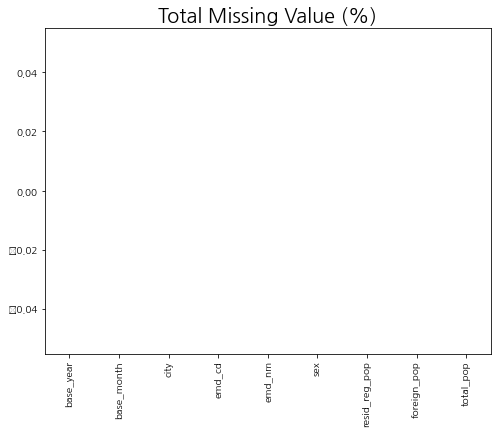

In [ ]:
#histogram
#missing_data = missing_data.head(20)

#missing data
total = df_data.isnull().sum().sort_values(ascending=False)
percent = (df_data.isnull().sum()/df_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

## 상관관계
- 0.998927의 수치는 거의 1과 같다. 주민등록 거주인구=그 지역 전체 인구
- totalpop이나 resid_reg_pop 중에 하나의 변수만 선택해도 무방함

In [ ]:
df_data.corr()

,base_year,base_month,emd_cd,resid_reg_pop,foreign_pop,total_pop
base_year,1.000000e+00,-2.082085e-01,7.068863e-12,0.006987,-0.008140,0.006319
base_month,-2.082085e-01,1.000000e+00,3.789344e-13,0.001677,0.011153,0.002241
emd_cd,7.068863e-12,3.789344e-13,1.000000e+00,-0.308155,-0.066486,-0.302200
resid_reg_pop,6.986931e-03,1.677153e-03,-3.081552e-01,1.000000,0.546006,0.998927
foreign_pop,-8.139654e-03,1.115281e-02,-6.648557e-02,0.546006,1.000000,0.584216
total_pop,6.318669e-03,2.241190e-03,-3.021996e-01,0.998927,0.584216,1.000000


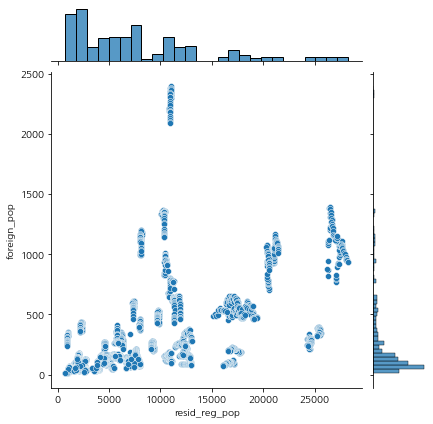

In [ ]:
sns.jointplot(x=df_data['resid_reg_pop'], y=df_data['foreign_pop'], kind='scatter')

## 성별은 유의미하지 않으므로 합치기

In [ ]:
sex_sum = df_data.groupby(['base_year', 'base_month', 'city', 'emd_cd', 'emd_nm']).sum().reset_index()
sex_sum

,base_year,base_month,city,emd_cd,emd_nm,resid_reg_pop,foreign_pop,total_pop
0,2018,1,서귀포시,50130250,대정읍,21085,1518,22603
1,2018,1,서귀포시,50130253,남원읍,19112,628,19740
2,2018,1,서귀포시,50130259,성산읍,15338,1575,16913
3,2018,1,서귀포시,50130310,안덕면,11462,522,11984
4,2018,1,서귀포시,50130320,표선면,12253,409,12662
...,...,...,...,...,...,...,...,...
1801,2021,6,제주시,50110650,연동,41910,1875,43785
1802,2021,6,제주시,50110660,노형동,55385,2088,57473
1803,2021,6,제주시,50110670,외도동,22086,274,22360
1804,2021,6,제주시,50110680,이호동,4520,155,4675


In [ ]:
df_nohyeng = sex_sum[sex_sum['emd_nm']=='노형동']
df_nohyeng

,base_year,base_month,city,emd_cd,emd_nm,resid_reg_pop,foreign_pop,total_pop
39,2018,1,제주시,50110660,노형동,53369,1589,54958
82,2018,2,제주시,50110660,노형동,53369,1664,55033
125,2018,3,제주시,50110660,노형동,53317,1683,55000
168,2018,4,제주시,50110660,노형동,53368,1770,55138
211,2018,5,제주시,50110660,노형동,53472,1973,55445
254,2018,6,제주시,50110660,노형동,53568,2012,55580
297,2018,7,제주시,50110660,노형동,53580,2038,55618
340,2018,8,제주시,50110660,노형동,53655,2040,55695
383,2018,9,제주시,50110660,노형동,53719,2040,55759
426,2018,10,제주시,50110660,노형동,53835,2173,56008


In [ ]:
type(df_nohyeng['total_pop'].min())

int

### 시각화 프로그램 태블루 연결 방식 활용해보기

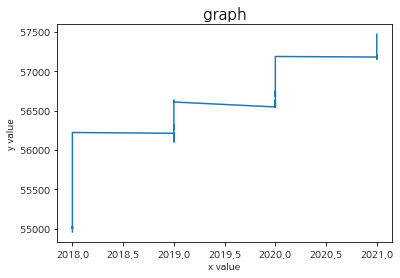

In [ ]:
x = df_nohyeng['base_year']
y = df_nohyeng['total_pop']

plt.plot(x, y)

plt.xlabel('x value')
plt.ylabel('y value')
plt.title('graph', fontsize=16)

plt.show()

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1630599273337' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;08&#47;0805test-1&#47;sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='0805test-1&#47;sheet3' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;08&#47;0805test-1&#47;sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='ko-KR' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1630599273337');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>